# __Google playstore Data 🏪__

<img src='https://newshunt360.com/wp-content/uploads/2020/07/Play-Store.png' style="width:100%;height:250px;border-radius:5px">

# Complete Exploratory Data Analysis

## About Dataset

> ##### __Context__

While there are lots of data available for apps on the Apple App Store that you can find on sites like [Kaggle](https://www.kaggle.com/), it's hard to find similar data for apps on the Google Play Store. This is because the way the two stores' web pages are set up is different. The Apple App Store has a simple layout that's easy to scrape for data. But the Google Play Store uses more complicated techniques, like loading pages dynamically, which makes scraping data from it trickier.

See [Original Dataset](https://www.kaggle.com/datasets/lava18/google-play-store-app/data)

> ##### __Content__

Each (app) row has values for catergory, rating, price, type, genres, and more.

> ##### __Acknowledgements__

This information is scraped from the `Google Play Store`. This app information would not be available without it.

> ##### __Inspiration__

The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market!

## 1. **Import Libraries**

In [118]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#this is for jupyter notebook to show the plot in the notebook itself instead of opening a new window for the plot
%matplotlib inline
import seaborn as sns

## 2. **Data Loading and exploration and cleaning**
 ➡ Load the csv file with the pandas
 
 ➡ creating the dataframe and understanding the data present in the dataset using pandas
 
 ➡ Dealing with the missing data, outliers and the incorrect records

In [2]:
df = pd.read_csv('googleplaystore1.csv')

- Viewing first five value

In [3]:
df.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


 - To view all rows and columns of the dataset

In [4]:
pd.set_option('display.max_columns', None) # used to display all columns from dataframe/dataset
pd.set_option('display.max_rows', None)  # used to display all rows from dataframe

- To hide all ruthless warnings

In [5]:
# hide all warnings
import warnings
warnings.filterwarnings('ignore')

- See the Columns name in the dataframe/dataset

In [6]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

- Shape of dataframe/dataset

In [7]:
df.shape

(10841, 13)

- let's have a look on the columns and their data types using detailed info function

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


- check's the null values

In [9]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

### *Observations*
---
I observed that:

1. There are 10841 rows and 13 columns in the dataset.
2. There are differen data types.
3. The columns in the dataset are: 

    - `['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type', Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver','Android Ver']`
    
4. There are missing values in the dataset which we read by info's and also deals with them later on in this notebook.
5. There are some columns which are object instead of they must be in numeric data type.  
   - `['Reviews', 'Size', 'Installs', 'Price']`
        

In [10]:
df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


### Observations:
---
- We have only 1 column as numeric data type, rest all are object data type (according to python), but we can see that `Reviews`, `'Size', 'Installs', 'Price'` are also numeric, we must convert them to numeric data type in data wrangling process.
---

##### Let's clean `Size` column first

In [11]:
# checking any null values
df['Size'].isnull().sum()

0

In [12]:
# checking unique values
df['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

There are many unique values in the Size column with `M`, `K` and `Varies with device`, First make the unit into one common unit from M and K to bytes, and then remove the M and K from the values and convert them into numeric data type.


##### Count 'M', 'k' and varies in dataset

- 'M' counts

In [13]:
df['Size'].loc[df['Size'].str.contains('M')].value_counts().sum()

8829

 - 'k' counts

In [14]:
df['Size'].loc[df['Size'].str.contains('k')].value_counts().sum()

316

 - 'Varies with device' counts

In [15]:
df['Size'].loc[df['Size'].str.contains('Varies with device')].value_counts().sum()

1695

In [16]:
# Sum = M + k + varies with device
8829 + 316 + 1695

10840

In [17]:
df['Size'].value_counts().sum()

10841

__Note:__ This is the difference that size have 10840 values and dataset have 10841 value

### Observations of Size column
  - There are `8829` value in the size value which contains `M`
  - There are `316` value in the size value which contains `k`
  - There are `1695` value in the size value which contains `Varies with device`
  
    > Let's convert the M and K units into bytes and then remove the M and K from the values and convert them into numeric data type.

In [18]:
# Converting size column function
'''This function will convert the size column to numeric by multiplying the values with 1024 if it has 'k' in it and 1024*1024 if it has 'M' in it.'''
def convert_into_bytes(size):
    if isinstance(size, str):
        if 'k' in size:
            return float(size.replace('k','')) * 1024     # 1kb = 1024 bytes
        elif 'M' in size:
            return float(size.replace('M', '')) * 1024 * 1024     # 1Mb = 1024*1024 bytes
        elif 'Varies with device' in size:
            return np.nan
    return (size)
    
    

In [19]:
#see size is in M,k..before applying the function
df.sample(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10054,Aurum Blade EX,FAMILY,4.3,28151,17M,"1,000,000+",Free,0,Everyone 10+,Role Playing,"June 4, 2015",1.0.2,2.2 and up
157,Spanish English Translator,BOOKS_AND_REFERENCE,4.2,87873,Varies with device,"10,000,000+",Free,0,Teen,Books & Reference,"May 28, 2018",Varies with device,Varies with device


In [20]:
# apply by calling function
df['Size'] = df['Size'].apply(convert_into_bytes)

In [21]:
# size column in numeric in float
df.head(3)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19922944.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14680064.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,9122611.2,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up


In [22]:
# dtype checking of size
df['Size'].dtype

dtype('O')

 - Changing the size column name from 'Size' to 'Size_in_bytes'

In [23]:
df.rename(columns={'Size' : 'Size_in_bytes'}, inplace=True)

 - convert to_numeric

In [24]:
df['Size_in_bytes'] = pd.to_numeric(df['Size_in_bytes'], errors='coerce')

 - dtype checking of Size_in_bytes

In [25]:
df['Size_in_bytes'].dtype

dtype('float64')

 - Creating new two columns `Size_in_Mb` and `Size_in_kb`

In [26]:
df['Size_in_Mb'] = df['Size_in_bytes'].apply(lambda x: x/ (1024 * 1024)) # lambda is inline-function
df['Size_in_Kb'] = df['Size_in_bytes'].apply(lambda x: x/ 1024) # lambda is inline-function

In [27]:
#see the random sample value from dataset
df.sample(3)

,App,Category,Rating,Reviews,Size_in_bytes,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_in_Mb,Size_in_Kb
6966,Water Surfer Floating BMX Bicycle Rider Racing,FAMILY,4.4,551,39845888.0,"100,000+",Free,0,Everyone,Simulation,"July 3, 2017",1.0,2.3 and up,38.0,38912.0
5586,Lullaby Add-on for Sleep as Android,HEALTH_AND_FITNESS,3.9,2057,6501171.2,"50,000+",Paid,$1.99,Everyone,Health & Fitness,"October 18, 2017",2.4,4.0 and up,6.2,6348.8
7495,Night Camera Blur Effect,PHOTOGRAPHY,3.6,100,2621440.0,"10,000+",Free,0,Everyone,Photography,"August 5, 2018",4.2,4.2 and up,2.5,2560.0


- Now we have converted every value into bytes and removed the M and K from the values and converted them into numeric data type.
- 'Varies with device' was a string value, therefore we intentionally converted them into null values as seen in function, which we can fill later on according to our needs.

In [28]:
df.describe()

,Rating,Size_in_bytes,Size_in_Mb,Size_in_Kb
count,9367.000000,9.145000e+03,9145.000000,9145.000000
mean,4.193338,2.256133e+07,21.516165,22032.553406
std,0.537431,2.368637e+07,22.589084,23131.222364
min,1.000000,8.704000e+03,0.008301,8.500000
25%,4.000000,5.138022e+06,4.900000,5017.600000
50%,4.300000,1.363149e+07,13.000000,13312.000000
75%,4.500000,3.145728e+07,30.000000,30720.000000
max,19.000000,1.048576e+08,100.000000,102400.000000


---

#### **Installs column**

In [29]:
df['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0', 'Free'], dtype=object)

In [30]:
df['Installs'].value_counts()

Installs
1,000,000+        1579
10,000,000+       1252
100,000+          1169
10,000+           1054
1,000+             907
5,000,000+         752
100+               719
500,000+           539
50,000+            479
5,000+             477
100,000,000+       409
10+                386
500+               330
50,000,000+        289
50+                205
5+                  82
500,000,000+        72
1+                  67
1,000,000,000+      58
0+                  14
0                    1
Free                 1
Name: count, dtype: int64

#### **Observations**  Install column

- The only problem I see here is the `+` sign in the values, let's remove them and convert the column into numeric data type.
- There are no null values in the Installs column.
- The total values in the Installs column are `10841`.
- However, one value `0` has no plus sign.
- Let's remove the sign `+` and `,` from the values and convert them into numeric data type.

In [31]:
df['Installs'].loc[df['Installs'].str.contains('\\+')].value_counts().sum()

10839

In [32]:
df['Installs'].value_counts().sum()

10841

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size_in_bytes   9145 non-null   float64
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
 13  Size_in_Mb      9145 non-null   float64
 14  Size_in_Kb      9145 non-null   float64
dtypes: float64(4), object(11)
memory usage: 1.2+ MB


##### **Convertion process on Install**

In [34]:
# Convert 'Installs' column to string type
df['Installs'] = df['Installs'].astype(str)

# Remove non-numeric values ('Free') from the 'Installs' column
df['Installs'] = df['Installs'].apply(lambda x: x.replace('Free', '0') if 'Free' in x else x)

# Remove the '+' character from the values
df['Installs'] = df['Installs'].apply(lambda x: x.replace('+', ''))

# Remove commas from the 'Installs' values
df['Installs'] = df['Installs'].str.replace(',', '')

# Convert 'Installs' values to integers32
df['Installs'] = df['Installs'].astype(int)


In [35]:
# removing + and , from Install's values
df['Installs'] = df['Installs'].apply(lambda x : x.replace('+', '') if '+' in str(x) else x)

# removing , from Install's values
df['Installs'] = df['Installs'].apply(lambda x : x.replace(',', '') if ',' in str(x) else x)

#converting Install's values to int64
df['Installs'] = df['Installs'].apply(lambda x : int(x))


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size_in_bytes   9145 non-null   float64
 5   Installs        10841 non-null  int64  
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
 13  Size_in_Mb      9145 non-null   float64
 14  Size_in_Kb      9145 non-null   float64
dtypes: float64(4), int64(1), object(10)
memory usage: 1.2+ MB


In [37]:
#Checking
df.sample(3)

,App,Category,Rating,Reviews,Size_in_bytes,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_in_Mb,Size_in_Kb
1569,Easy Makeup Tutorials,LIFESTYLE,4.3,7287,5242880.0,1000000,Free,0,Everyone,Lifestyle,"November 3, 2016",1.0,2.3 and up,5.0,5120.0
6551,Boom Beach,FAMILY,4.5,5591653,99614720.0,50000000,Free,0,Everyone 10+,Strategy,"July 18, 2018",35.119,4.0.3 and up,95.0,97280.0
2189,Avokiddo Emotions,FAMILY,4.6,73,12582912.0,1000,Paid,$2.99,Everyone,Education;Pretend Play,"May 21, 2018",1.7.0,4.0.3 and up,12.0,12288.0


In [38]:
df['Installs'].dtype

dtype('int64')

In [39]:
# making a new column called 'Installs_category' which will have the category of the installs
bins = [-1, 0, 10, 1000, 10000, 100000, 1000000, 10000000, 10000000000]
lables = ['no', 'Very Low', 'Low', 'Moderate', 'More than moderate', 'High', 'Very High','Top Notch']
df['Installs_category'] = pd.cut(df['Installs'],bins=bins,labels=lables)

In [40]:
df['Installs_category'].value_counts()

Installs_category
Low                   2161
High                  2118
Very High             2004
More than moderate    1648
Moderate              1531
Top Notch              828
Very Low               535
no                      16
Name: count, dtype: int64

---

#### **Price column**

In [41]:
df['Price'].isnull().sum()

0

- Check null values and Unique in price column.

In [42]:
df['Price'].value_counts()

Price
0           10040
$0.99         148
$2.99         129
$1.99          73
$4.99          72
$3.99          63
$1.49          46
$5.99          30
$2.49          26
$9.99          21
$6.99          13
$399.99        12
$14.99         11
$4.49           9
$29.99          7
$24.99          7
$3.49           7
$7.99           7
$5.49           6
$19.99          6
$11.99          5
$6.49           5
$12.99          5
$8.99           5
$10.00          3
$16.99          3
$1.00           3
$2.00           3
$13.99          2
$8.49           2
$17.99          2
$1.70           2
$3.95           2
$79.99          2
$7.49           2
$9.00           2
$10.99          2
$39.99          2
$33.99          2
$19.40          1
$3.90           1
$1.96           1
$4.60           1
$15.46          1
$3.04           1
$4.29           1
$2.60           1
$3.28           1
$4.80           1
$4.59           1
$3.08           1
$28.99          1
$2.95           1
$2.90           1
$1.97           1
$200

In [43]:
df['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', 'Everyone', '$1.20', '$1.04'], dtype=object)

- We need to confirm if the values in the `Price` column are only with $ sign or not

In [44]:
# How many value contains $ sign
df['Price'].loc[df['Price'].str.contains('\$')].value_counts().sum()

800

In [45]:
# counts the price which values contains 0 but dose not contains $ sign
df['Price'].loc[df['Price'].str.contains('0') & (~df['Price'].str.contains('\\$'))].value_counts().sum()

10040

In [46]:
df['Price'] = df['Price'].apply(lambda x: x.replace('$', "") if '$' in str(x) else x)

In [47]:
df['Price'].value_counts()

Price
0           10040
0.99          148
2.99          129
1.99           73
4.99           72
3.99           63
1.49           46
5.99           30
2.49           26
9.99           21
6.99           13
399.99         12
14.99          11
4.49            9
29.99           7
24.99           7
3.49            7
7.99            7
5.49            6
19.99           6
11.99           5
6.49            5
12.99           5
8.99            5
10.00           3
16.99           3
1.00            3
2.00            3
13.99           2
8.49            2
17.99           2
1.70            2
3.95            2
79.99           2
7.49            2
9.00            2
10.99           2
39.99           2
33.99           2
19.40           1
3.90            1
1.96            1
4.60            1
15.46           1
3.04            1
4.29            1
2.60            1
3.28            1
4.80            1
4.59            1
3.08            1
28.99           1
2.95            1
2.90            1
1.97            1
200.

In [48]:
# convert the dtype of price O -> float64
def convert_price(value):
    try:
        return float(value)
    except ValueError:
        return None

df['Price'] = df['Price'].apply(convert_price)

- The sum of above values is equal to total values in `Price` column, which means there are `800` values which contains `$` sign and `10040` values which contains 0 value.

In [49]:
df['Price'].dtype

dtype('float64')

In [50]:
df.sample(3)

,App,Category,Rating,Reviews,Size_in_bytes,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_in_Mb,Size_in_Kb,Installs_category
3146,SNCF,TRAVEL_AND_LOCAL,3.4,15750,NaN,5000000,Free,0.0,Everyone,Travel & Local,"August 2, 2018",Varies with device,Varies with device,NaN,NaN,Very High
9882,EU in the World,FAMILY,NaN,8,7549747.2,100,Free,0.0,Everyone,Entertainment,"March 2, 2018",1.1.1,4.1 and up,7.2,7372.8,Low
143,Amazon Kindle,BOOKS_AND_REFERENCE,4.2,814080,NaN,100000000,Free,0.0,Teen,Books & Reference,"July 27, 2018",Varies with device,Varies with device,NaN,NaN,Top Notch


In [51]:
# Use f string to print min, max, average of price
print(f"Min price is :{df['Price'].min()}$")

print(f"Max price is :{df['Price'].max()}$")

print(f"Average price is :{df['Price'].mean()}$")

Min price is :0.0$
Max price is :400.0$
Average price is :1.027368081180812$


In [52]:
df.describe()

,Rating,Size_in_bytes,Installs,Price,Size_in_Mb,Size_in_Kb
count,9367.000000,9.145000e+03,1.084100e+04,10840.000000,9145.000000,9145.000000
mean,4.193338,2.256133e+07,1.546291e+07,1.027368,21.516165,22032.553406
std,0.537431,2.368637e+07,8.502557e+07,15.949703,22.589084,23131.222364
min,1.000000,8.704000e+03,0.000000e+00,0.000000,0.008301,8.500000
25%,4.000000,5.138022e+06,1.000000e+03,0.000000,4.900000,5017.600000
50%,4.300000,1.363149e+07,1.000000e+05,0.000000,13.000000,13312.000000
75%,4.500000,3.145728e+07,5.000000e+06,0.000000,30.000000,30720.000000
max,19.000000,1.048576e+08,1.000000e+09,400.000000,100.000000,102400.000000


---

#### Review column

In [53]:
df['Reviews'].dtype

dtype('O')

In [54]:
# Convert 'Reviews' column to numeric
df['Reviews'] = pd.to_numeric(df['Reviews'], errors='coerce')

# Check the data type after conversion
print(df['Reviews'].dtype)

float64


In [55]:
df.describe()

,Rating,Reviews,Size_in_bytes,Installs,Price,Size_in_Mb,Size_in_Kb
count,9367.000000,1.084000e+04,9.145000e+03,1.084100e+04,10840.000000,9145.000000,9145.000000
mean,4.193338,4.441529e+05,2.256133e+07,1.546291e+07,1.027368,21.516165,22032.553406
std,0.537431,2.927761e+06,2.368637e+07,8.502557e+07,15.949703,22.589084,23131.222364
min,1.000000,0.000000e+00,8.704000e+03,0.000000e+00,0.000000,0.008301,8.500000
25%,4.000000,3.800000e+01,5.138022e+06,1.000000e+03,0.000000,4.900000,5017.600000
50%,4.300000,2.094000e+03,1.363149e+07,1.000000e+05,0.000000,13.000000,13312.000000
75%,4.500000,5.477550e+04,3.145728e+07,5.000000e+06,0.000000,30.000000,30720.000000
max,19.000000,7.815831e+07,1.048576e+08,1.000000e+09,400.000000,100.000000,102400.000000


---

## 2.1 **Descriptive Statistics**

In [56]:
df.describe()

,Rating,Reviews,Size_in_bytes,Installs,Price,Size_in_Mb,Size_in_Kb
count,9367.000000,1.084000e+04,9.145000e+03,1.084100e+04,10840.000000,9145.000000,9145.000000
mean,4.193338,4.441529e+05,2.256133e+07,1.546291e+07,1.027368,21.516165,22032.553406
std,0.537431,2.927761e+06,2.368637e+07,8.502557e+07,15.949703,22.589084,23131.222364
min,1.000000,0.000000e+00,8.704000e+03,0.000000e+00,0.000000,0.008301,8.500000
25%,4.000000,3.800000e+01,5.138022e+06,1.000000e+03,0.000000,4.900000,5017.600000
50%,4.300000,2.094000e+03,1.363149e+07,1.000000e+05,0.000000,13.000000,13312.000000
75%,4.500000,5.477550e+04,3.145728e+07,5.000000e+06,0.000000,30.000000,30720.000000
max,19.000000,7.815831e+07,1.048576e+08,1.000000e+09,400.000000,100.000000,102400.000000


### Observations
---
- Now, we have only 6 columns as numeric data type.
- We can observe their descriptive statistics. and make tons of observations as per our hypotheses.
- We can see that the `Rating` column has a minimum value of `1` and a maximum value of `5`, which is the range of rating, and the mean is `4.19` which  is a good rating. On an average people give this rating.
- We can see that the Reviews column has a minimum value of 0 and a maximum value of `78,158,306` 78+ Millions, which is the range of reviews, and the mean is `444,111.93` which is a good number of reviews. On an average people give this number of reviews to the apps. But it does not make sense to us, as we have different categories of apps.
- Similarly, we can observe the other columns as well.
  
Therefore, the most important thing is to classify as app based on the correlation matrix and then observe the descriptive statistics of the app category and number of installs, reviews, ratings, etc.

## 2.2 *Deals Missing values*
Dealing with the missing values is one of the most important part of the data wrangling process, we must deal with the missing values in order to get the correct insights from the data.

In [57]:
df.isnull().sum()

App                     0
Category                0
Rating               1474
Reviews                 1
Size_in_bytes        1696
Installs                0
Type                    1
Price                   1
Content Rating          1
Genres                  0
Last Updated            0
Current Ver             8
Android Ver             3
Size_in_Mb           1696
Size_in_Kb           1696
Installs_category       0
dtype: int64

In [58]:
df.isnull().sum().sort_values(ascending=False)

Size_in_bytes        1696
Size_in_Mb           1696
Size_in_Kb           1696
Rating               1474
Current Ver             8
Android Ver             3
Reviews                 1
Type                    1
Price                   1
Content Rating          1
App                     0
Category                0
Installs                0
Genres                  0
Last Updated            0
Installs_category       0
dtype: int64

- There are same number of values in `Size_in_Mb` and `Size_in_Kb`. so one is drop

In [59]:
df.drop(columns=['Size_in_Kb'], inplace=True)
# df['Size_in_Kb'].dropna(inplace=True)

In [60]:
df.sample(3)

,App,Category,Rating,Reviews,Size_in_bytes,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_in_Mb,Installs_category
1625,Scarf Fashion Designer,LIFESTYLE,4.4,16637.0,10485760.0,1000000,Free,0.0,Everyone,Lifestyle,"June 18, 2017",1.8,2.3 and up,10.0,High
7467,CONTRACT KILLER: ZOMBIES (NR),GAME,4.4,206602.0,13631488.0,5000000,Free,0.0,Mature 17+,Action,"July 1, 2013",3.1.0,2.1 and up,13.0,Very High
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114.0,NaN,1000,Free,0.0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device,NaN,Low


In [61]:
# Total number of null values in dataframe
df.isnull().sum().sum()

4881

In [62]:
(df.isnull().sum() / len(df) * 100).sort_values(ascending=False)  # Percentage of missing values in each column

Size_in_bytes        15.644313
Size_in_Mb           15.644313
Rating               13.596532
Current Ver           0.073794
Android Ver           0.027673
Reviews               0.009224
Type                  0.009224
Price                 0.009224
Content Rating        0.009224
App                   0.000000
Category              0.000000
Installs              0.000000
Genres                0.000000
Last Updated          0.000000
Installs_category     0.000000
dtype: float64

- Lets plot missing values in the dataset

<Axes: >

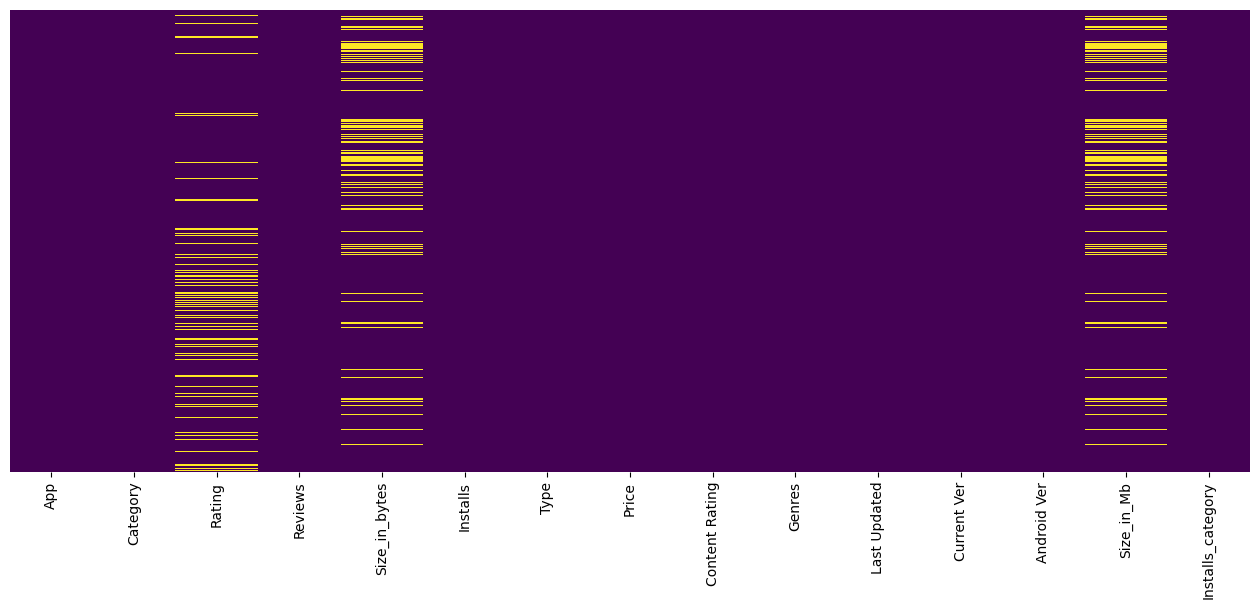

In [63]:
plt.figure(figsize=(16,6))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

- There is another way, let's plot the missing values by percentage

Text(0.5, 1.0, 'Percentage of missing values in each column')

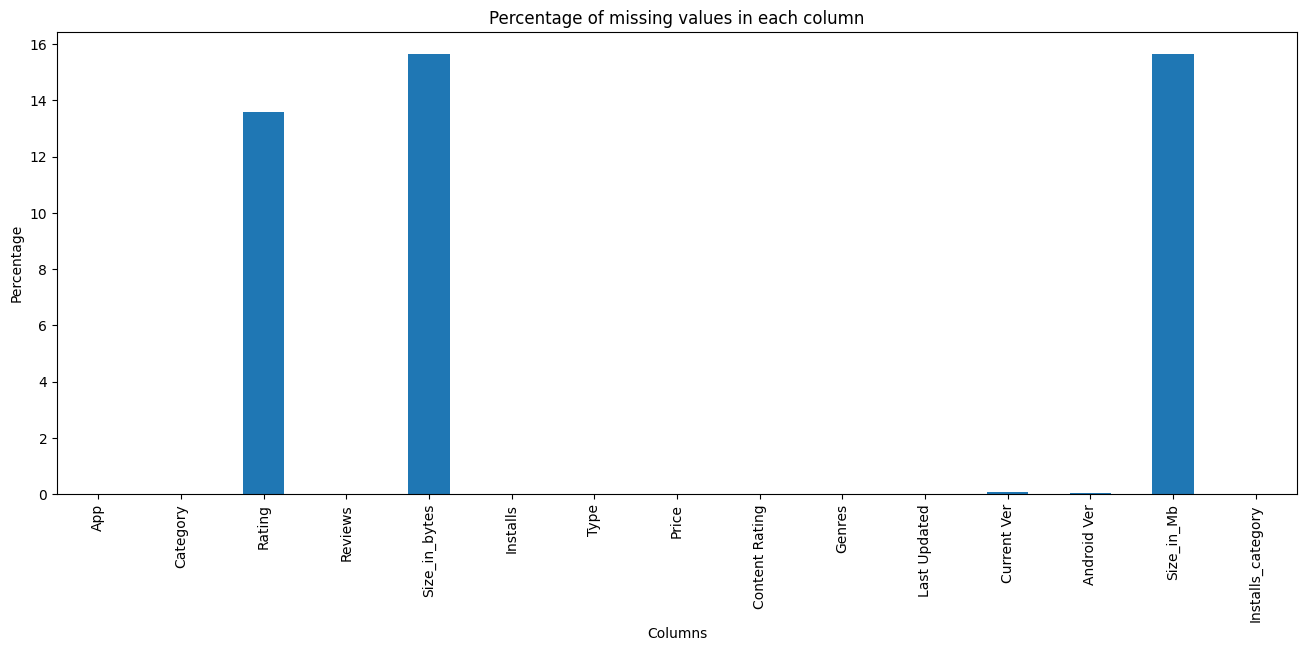

In [64]:
plt.figure(figsize=(16,6))
missing_percenatage = df.isnull().sum() / len(df) * 100
missing_percenatage.plot(kind='bar')
plt.xlabel('Columns')
plt.ylabel('Percentage')
plt.title('Percentage of missing values in each column')

- Less than 1 , missing values

Text(0.5, 1.0, 'Percentage of missing values in each column')

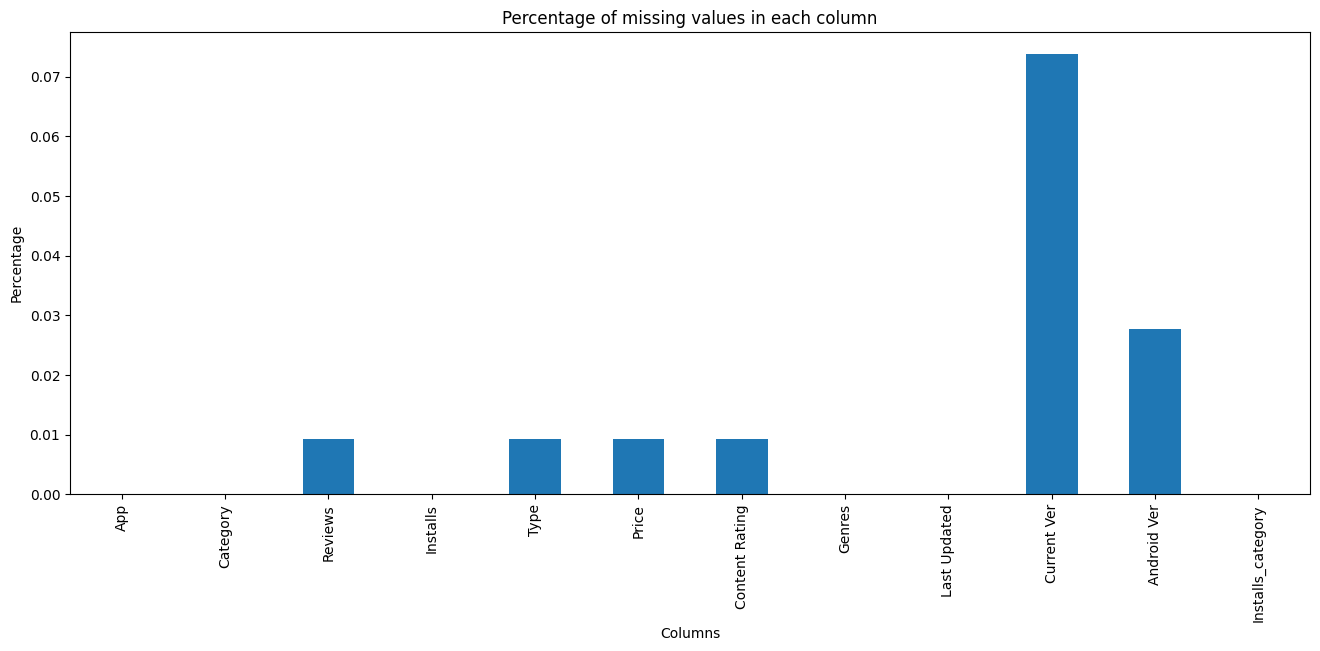

In [65]:
plt.figure(figsize=(16,6))
missing_percenatage[missing_percenatage < 1].plot(kind='bar')
plt.xlabel('Columns')
plt.ylabel('Percentage')
plt.title('Percentage of missing values in each column')

In [66]:
df.isnull().sum().sort_values(ascending=False)

Size_in_bytes        1696
Size_in_Mb           1696
Rating               1474
Current Ver             8
Android Ver             3
Reviews                 1
Type                    1
Price                   1
Content Rating          1
App                     0
Category                0
Installs                0
Genres                  0
Last Updated            0
Installs_category       0
dtype: int64

In [67]:
(df.isnull().sum() / len(df) * 100).sort_values(ascending=False)

Size_in_bytes        15.644313
Size_in_Mb           15.644313
Rating               13.596532
Current Ver           0.073794
Android Ver           0.027673
Reviews               0.009224
Type                  0.009224
Price                 0.009224
Content Rating        0.009224
App                   0.000000
Category              0.000000
Installs              0.000000
Genres                0.000000
Last Updated          0.000000
Installs_category     0.000000
dtype: float64

---

### Observations
- We have 1696 missing values in the `Size_in_bytes` and `Size_in_Mb` columns, which is 15.6% of the total values in the column.
- We have 1474 missing values in the `Rating` column, which is 13.6% of the total values in the column.
- We have 8 missing value in the `Current Ver` column, which is 0.07% of the total values in the column.
- We have 3 missing values in the `Android Ver` column, which is 0.01% of the total values in the column.
- We have only 1 missing value in `Reviews`, `Type`, `Price`, and `Content Rating` columns which is 0.009% of the total values in the column.

---

## 2.3 Deals with Missing Values
- We can not impute the `Rating` column as is is directly linked with the installation column. To test this Hypothesis we need to plot the Rating column with the `Installs` and Size columns and statistically test it using pearson correlation test.

 - Run Correlation

In [68]:
df.describe()

,Rating,Reviews,Size_in_bytes,Installs,Price,Size_in_Mb
count,9367.000000,1.084000e+04,9.145000e+03,1.084100e+04,10840.000000,9145.000000
mean,4.193338,4.441529e+05,2.256133e+07,1.546291e+07,1.027368,21.516165
std,0.537431,2.927761e+06,2.368637e+07,8.502557e+07,15.949703,22.589084
min,1.000000,0.000000e+00,8.704000e+03,0.000000e+00,0.000000,0.008301
25%,4.000000,3.800000e+01,5.138022e+06,1.000000e+03,0.000000,4.900000
50%,4.300000,2.094000e+03,1.363149e+07,1.000000e+05,0.000000,13.000000
75%,4.500000,5.477550e+04,3.145728e+07,5.000000e+06,0.000000,30.000000
max,19.000000,7.815831e+07,1.048576e+08,1.000000e+09,400.000000,100.000000


<Axes: title={'center': 'Correlation of Seven Columns'}>

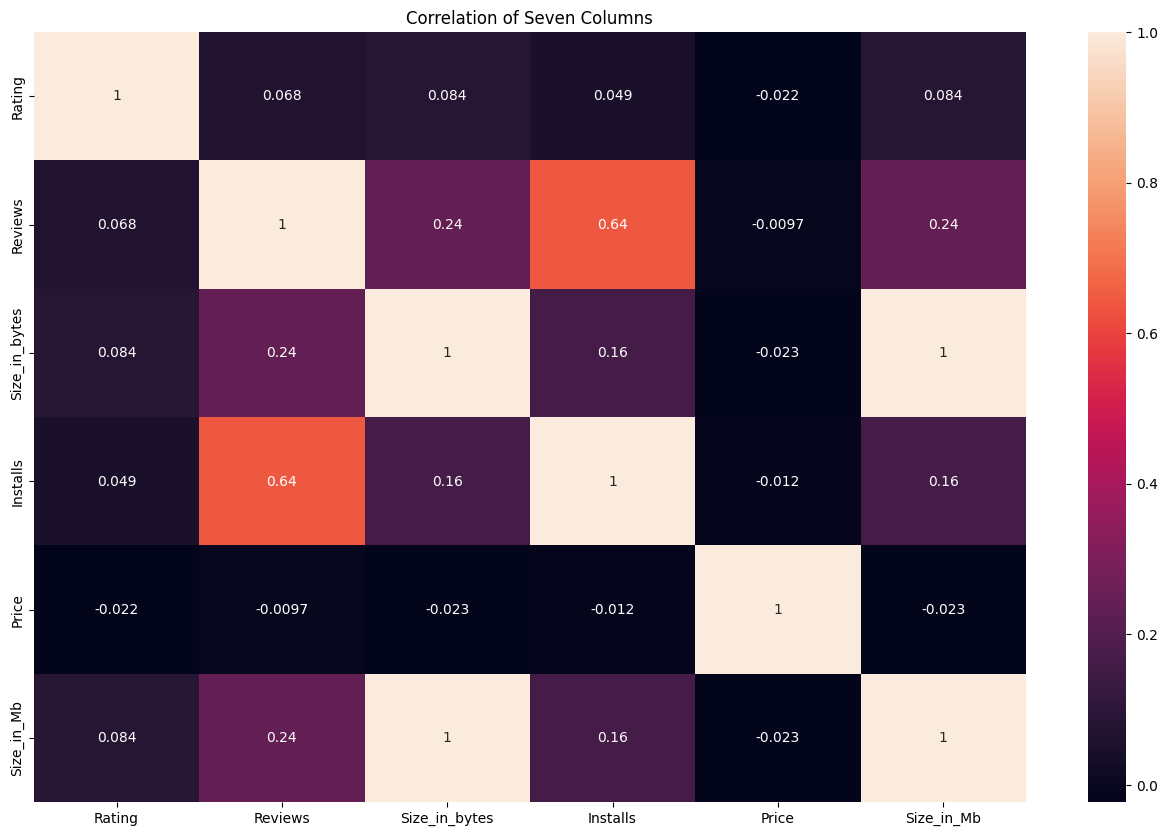

In [69]:
plt.figure(figsize=(16,10))
numeric_cols = ['Rating', 'Reviews' ,'Size_in_bytes', 'Installs', 'Price', 'Size_in_Mb']   # list of columns
plt.title("Correlation of Seven Columns")
sns.heatmap(df[numeric_cols].corr(),annot=True)  # (heatmap) plotting correlation matrix

In [70]:
# Correlation using pandas function of same columns
df[numeric_cols].corr()

,Rating,Reviews,Size_in_bytes,Installs,Price,Size_in_Mb
Rating,1.000000,0.068141,0.083737,0.048652,-0.021903,0.083737
Reviews,0.068141,1.000000,0.238214,0.643122,-0.009667,0.238214
Size_in_bytes,0.083737,0.238214,1.000000,0.164787,-0.023007,1.000000
Installs,0.048652,0.643122,0.164787,1.000000,-0.011689,0.164787
Price,-0.021903,-0.009667,-0.023007,-0.011689,1.000000,-0.023007
Size_in_Mb,0.083737,0.238214,1.000000,0.164787,-0.023007,1.000000


In [71]:
# We can calculate the pearson correlation coefficient using scipy as well as follows
from scipy import stats
df_clean = df.dropna()
pearson_r,_ = stats.pearsonr(df_clean['Reviews'],df_clean['Installs'])
print(f"Pearson's R between Rating and Installs is {pearson_r:.4f}")


Pearson's R between Rating and Installs is 0.6262


---

### Observations
- Lighter color shows the high correlation and darker color shows the low correlation
- We can see that the `Reviews` column has a high correlation with the `Installs` column, which is `0.62` according to corr(). Which is quite good.
  - This shows that the more the reviews the more the installs are for one app. If in any case we need to impute reviews we have to think of number of install.
      - If we have an ap with 2 installs and we imputer the reviews with 1000 or via average reviews then it will be wrong.
- `Installs` is slightly correlated with `Size_in_Mb` or `Size_in_bytes` , which is 0.16, this also shows us the importance of size and Installs. But we can not depend on it as the Peason correlation is very low.

---

- Before going ahead, let's remove the rows with missing values in the Current Ver, Android Ver, Category, Type and Genres columns, as they are very less in number and will not affect our analysis.

In [72]:
print(f"The length of the dataframe before removing null values is :{len(df)}")

The length of the dataframe before removing null values is :10841


In [73]:
df.isnull().sum()

App                     0
Category                0
Rating               1474
Reviews                 1
Size_in_bytes        1696
Installs                0
Type                    1
Price                   1
Content Rating          1
Genres                  0
Last Updated            0
Current Ver             8
Android Ver             3
Size_in_Mb           1696
Installs_category       0
dtype: int64

In [74]:
# remove the rows having null values in the 'Current Ver', 'Android Ver', 'Category', 'Type' and 'Genres' column
df.dropna(subset=['App', 'Category', 'Reviews', 'Installs', 'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver'],inplace=True)
# df.dropna(subset=['Current Ver', 'Android Ver', 'Category', 'Type', 'Genres'],inplace=True)

In [75]:
print(f"The length of the dataframe after removing null values is :{len(df)}")

The length of the dataframe after removing null values is :10829


- We have removed 12 rows having null values in the Current Ver, Android Ver, Category, Type and Genres columns.


In [76]:
# let's check the null values again
df.isnull().sum().sort_values(ascending=False)


Size_in_bytes        1694
Size_in_Mb           1694
Rating               1469
App                     0
Category                0
Reviews                 0
Installs                0
Type                    0
Price                   0
Content Rating          0
Genres                  0
Last Updated            0
Current Ver             0
Android Ver             0
Installs_category       0
dtype: int64

### Observations
- Only Rating and Size_in_bytes or Size_in_Mb columns are left with missing values.
  - We know that we have to be carefull while deadling with Rating column, as it is directly linked with the Installs column.
  - In Size columns we already know about Varies with device values, which we have converted into null values, we do not need to impute at the moment, as every app has different size and nobody can predict that as nearly as possible.

In [77]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size_in_bytes', 'Installs',
       'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated',
       'Current Ver', 'Android Ver', 'Size_in_Mb', 'Installs_category'],
      dtype='object')

In [78]:
df.groupby('Installs_category')['Rating'].describe()

,count,mean,std,min,25%,50%,75%,max
Installs_category,,,,,,,,
no,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Very Low,81.0,4.637037,0.845199,1.0,4.8,5.0,5.0,5.0
Low,1278.0,4.170970,0.825605,1.0,3.8,4.4,4.8,5.0
Moderate,1440.0,4.035417,0.604428,1.4,3.8,4.2,4.5,5.0
More than moderate,1616.0,4.093255,0.505619,1.6,3.9,4.2,4.5,4.9
High,2113.0,4.207525,0.376594,1.8,4.0,4.3,4.5,4.9
Very High,2004.0,4.287076,0.294902,2.0,4.1,4.3,4.5,4.9
Top Notch,828.0,4.374396,0.193726,3.1,4.3,4.4,4.5,4.8


- Replacing the respective missing values of `Rating`, with respect to the average give in each `Installs Category`

In [79]:
df['Installs_category'].loc[df['Rating'].isnull()].value_counts()

Installs_category
Low                   880
Very Low              453
Moderate               88
More than moderate     31
no                     14
High                    3
Very High               0
Top Notch               0
Name: count, dtype: int64

In [80]:
df['Rating'] = df.groupby('Installs_category')['Rating'].transform(lambda x: x.fillna(x.mean()))

In [81]:
df['Installs_category'].loc[df['Rating'].isnull()].value_counts()

Installs_category
no                    14
Very Low               0
Low                    0
Moderate               0
More than moderate     0
High                   0
Very High              0
Top Notch              0
Name: count, dtype: int64

Text(7, 3.5, 'Null values: 0')

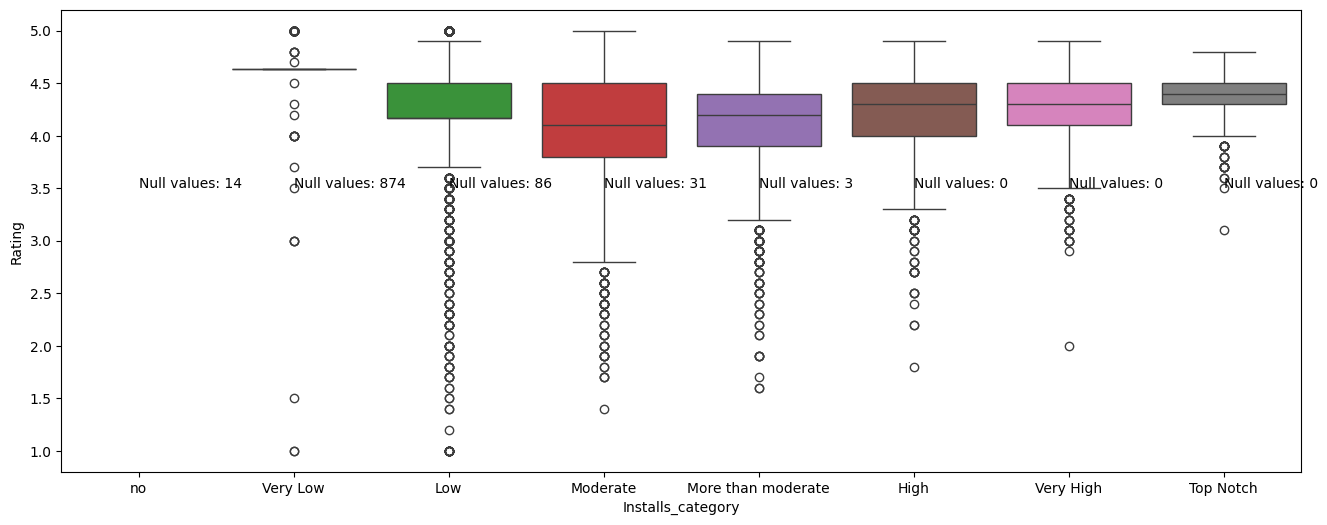

In [82]:
# plot the boxplot of Rating in each Installs_category
plt.figure(figsize=(16, 6)) # make figure size
sns.boxplot(x='Installs_category', y='Rating', hue='Installs_category', data=df) # plot the boxplot
# add the text of number of null values in each category
plt.text(0, 3.5, 'Null values: 14')
plt.text(1, 3.5, 'Null values: 874')
plt.text(2, 3.5, 'Null values: 86')
plt.text(3, 3.5, 'Null values: 31')
plt.text(4, 3.5, 'Null values: 3')
plt.text(5, 3.5, 'Null values: 0')
plt.text(6, 3.5, 'Null values: 0')
plt.text(7, 3.5, 'Null values: 0')

In [83]:
df['Installs_category'].loc[df['Reviews'].isnull()].value_counts()

Installs_category
no                    0
Very Low              0
Low                   0
Moderate              0
More than moderate    0
High                  0
Very High             0
Top Notch             0
Name: count, dtype: int64

- There are no Null values in Reviews

<Axes: xlabel='Installs_category', ylabel='Reviews'>

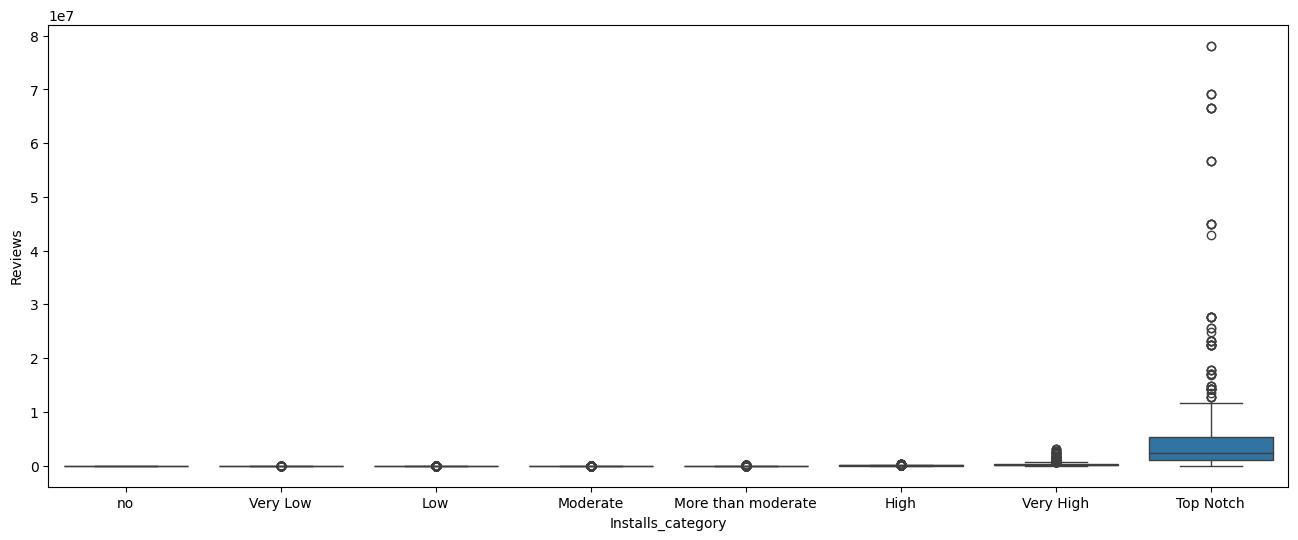

In [84]:
plt.figure(figsize=(16,6))
sns.boxplot(x='Installs_category', y='Reviews', data=df)


- The data looks really imbalance, let's normalize the data using log transformation

<Axes: xlabel='Installs_category', ylabel='Reviews'>

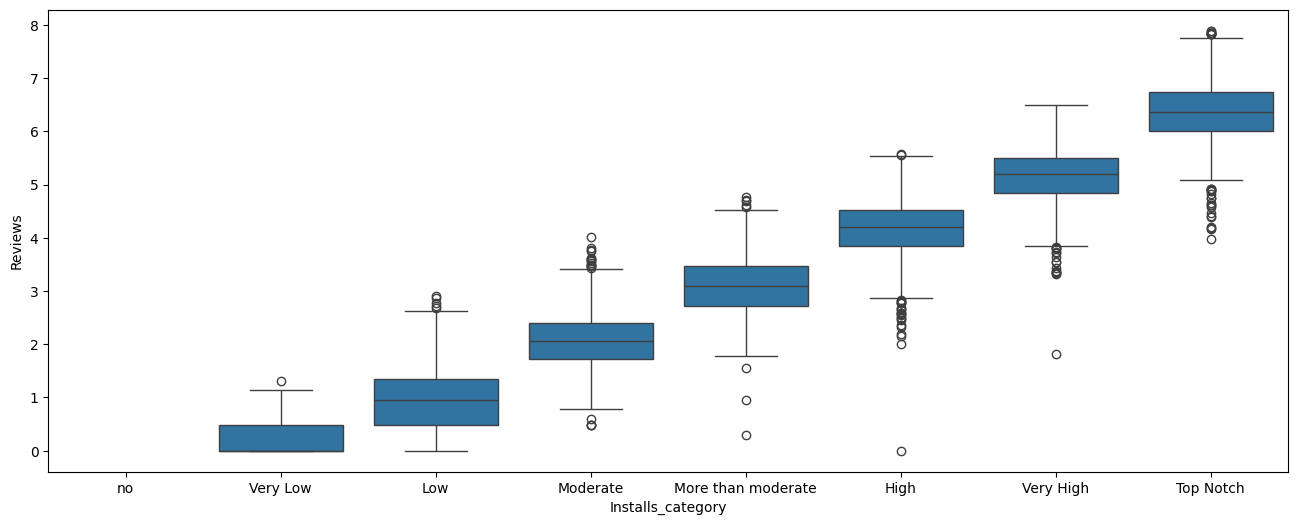

In [85]:
plt.figure(figsize=(16,6))
sns.boxplot(x='Installs_category', y=np.log10(df['Reviews']), data=df)

- We also draw the scatter plot of the Rating and Review columns with the Installs column

<Axes: xlabel='Rating', ylabel='Reviews'>

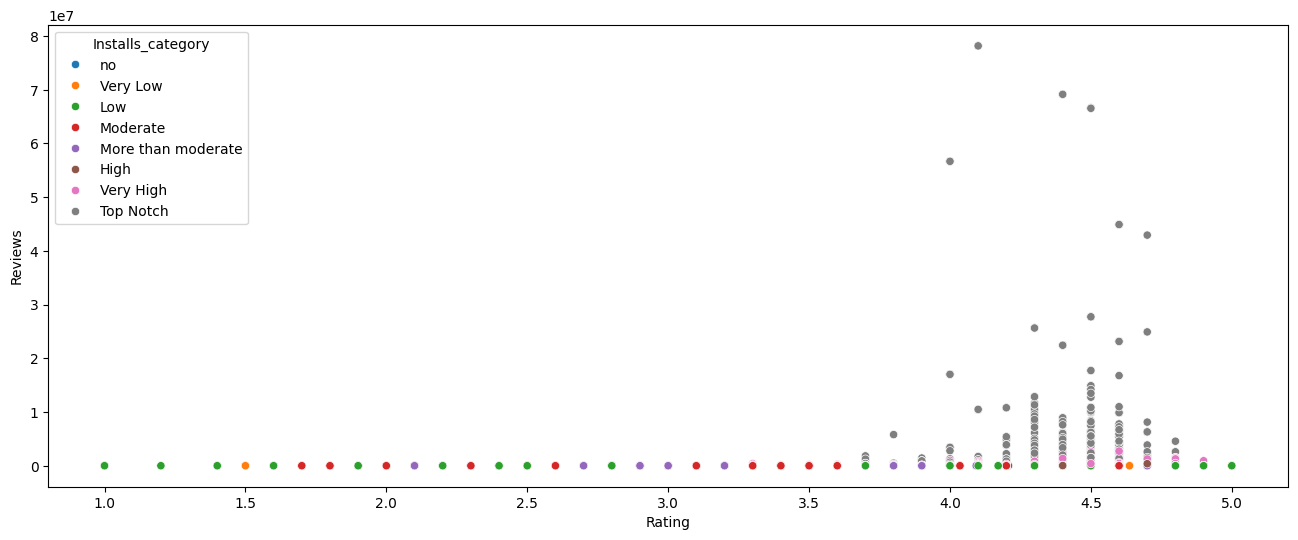

In [86]:
plt.figure(figsize=(16,6))
sns.scatterplot(x='Rating',y='Reviews',hue='Installs_category',data=df)

- It doesn't show any trend, because, you should know that Rating is a categorical variable (Ordinal) and Reviews is a continuous variable, therefore, we can not plot them together.
- Let's try with Reviews and Installs

<Axes: xlabel='Reviews', ylabel='Installs'>

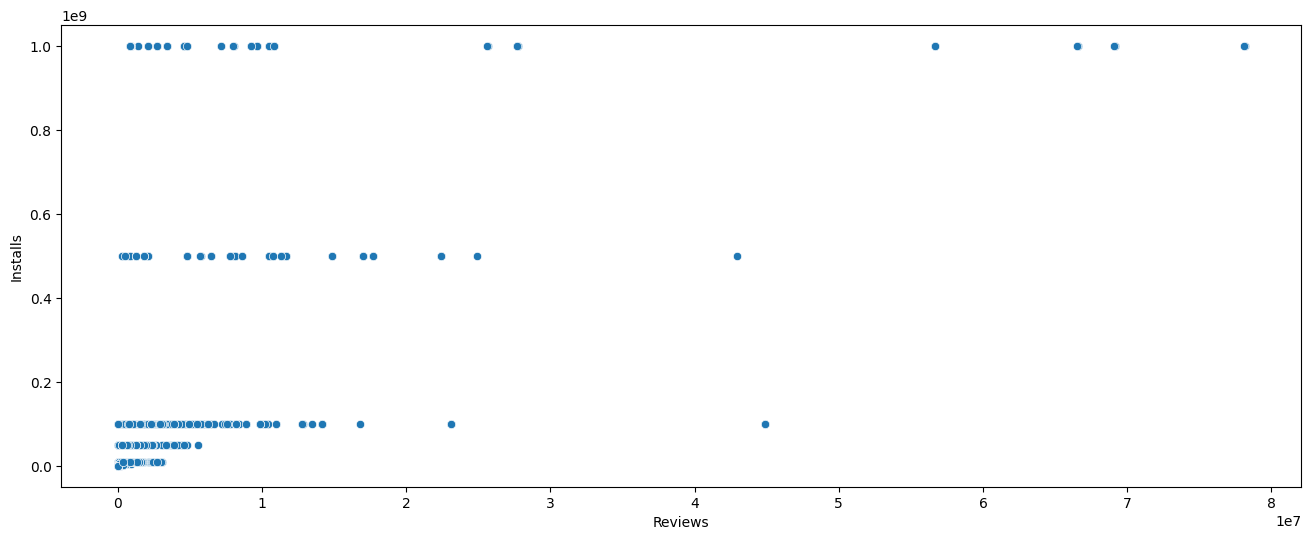

In [87]:
plt.figure(figsize=(16,6))
sns.scatterplot(x='Reviews',y='Installs',data=df)

- We did not see any trend and the issue is we need to normalize the data before plotting it, let's try with log transformation

<Axes: xlabel='Reviews', ylabel='Installs'>

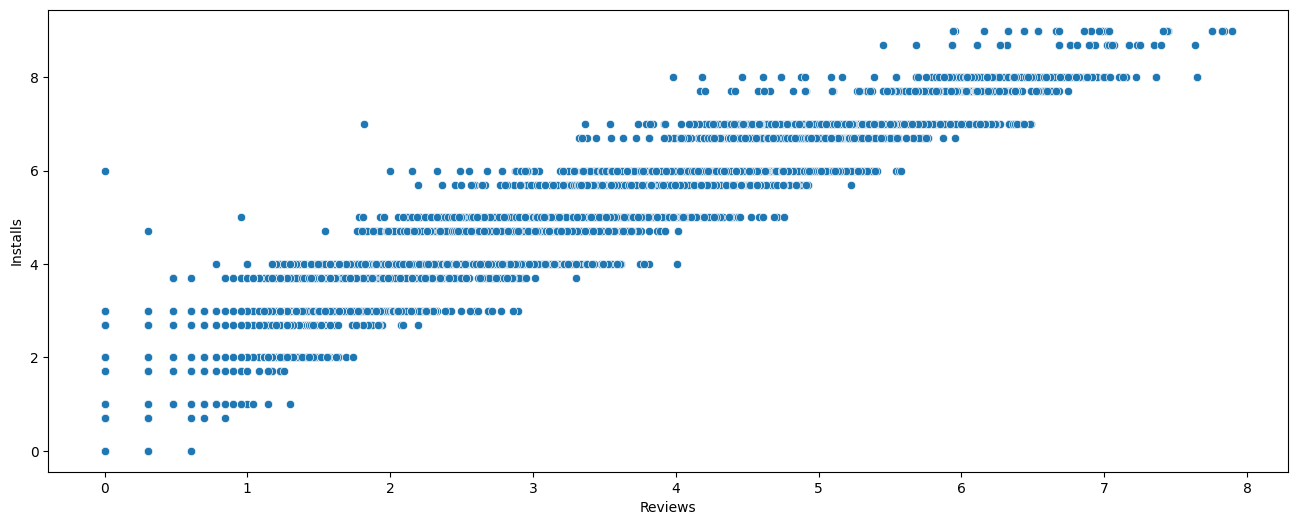

In [88]:
plt.figure(figsize=(16,6))
sns.scatterplot(x=np.log10(df['Reviews']),y=np.log10(df['Installs']),data=df)

- Now we see a slight trend but still the issue is installs were given in a factorial manner, as 10+, 20+, 1000+ etc, and these are not continuous number but Discreet one, therefore, we can only see a slight trends here. Let's plot a line plot to see the trend.

<Figure size 1600x600 with 0 Axes>

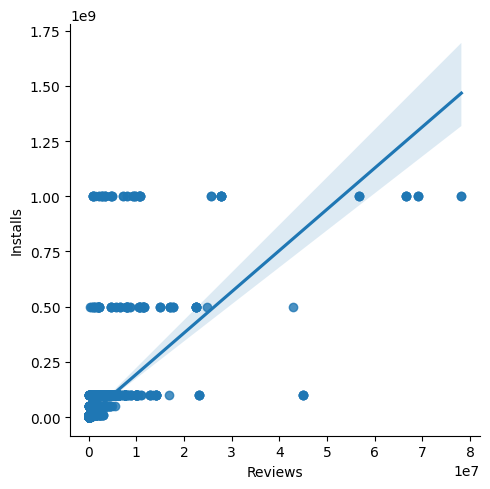

In [89]:
# plot reviews and installs in a scatter plot with trend line
plt.figure(figsize=(16, 6)) # make figure size
sns.lmplot(x='Reviews', y='Installs', data=df) # plot the scatter plot with trend line

- Here, we can see a nice trend, which shows that number of Reviews increases with the number of Installs, which is quite obvious.

In [90]:
df.isnull().sum()

App                     0
Category                0
Rating                 14
Reviews                 0
Size_in_bytes        1694
Installs                0
Type                    0
Price                   0
Content Rating          0
Genres                  0
Last Updated            0
Current Ver             0
Android Ver             0
Size_in_Mb           1694
Installs_category       0
dtype: int64

# Removing duplicates

- Removing duplicates is one of the most important part of the data wrangling process, we must remove the duplicates in order to get the correct insights from the data.
- If you do not remove duplicates from a dataset, it can lead to incorrect insights and analysis.
- Duplicates can skew statistical measures such as mean, median, and standard deviation, and can also lead to over-representation of certain data points.
- It is important to remove duplicates to ensure the accuracy and reliability of your data analysis.

In [91]:
df.duplicated().sum()

483

This shows us total duplicates, but we can also check based on the app name, as we know that every app has a unique name.

In [92]:
# find duplicate if any in the 'App' column
df['App'].duplicated().sum()

1181

- Let's check for number of duplicates in each column using a for loop and printing the output

In [93]:
for col in df.columns:
    print(f"Number of duplicated in {col} column is :{df[col].duplicated().sum()}")

Number of duplicated in App column is :1181
Number of duplicated in Category column is :10796
Number of duplicated in Rating column is :10784
Number of duplicated in Reviews column is :4830
Number of duplicated in Size_in_bytes column is :10373
Number of duplicated in Installs column is :10809
Number of duplicated in Type column is :10827
Number of duplicated in Price column is :10737
Number of duplicated in Content Rating column is :10823
Number of duplicated in Genres column is :10710
Number of duplicated in Last Updated column is :9453
Number of duplicated in Current Ver column is :7998
Number of duplicated in Android Ver column is :10796
Number of duplicated in Size_in_Mb column is :10373
Number of duplicated in Installs_category column is :10821


- This means that the only better way to find duplicates is to check for whole data

In [94]:
# print the number of duplicates in df
print(f"Number of duplicates in df are: {df.duplicated().sum()}")

Number of duplicates in df are: 483


- Let's remove duplicates

In [95]:
# remove the duplicates
df.drop_duplicates(inplace=True)

In [96]:
print(f"Number of rows after removing duplicates: {df.shape[0]}")

Number of rows after removing duplicates: 10346


- Now we have removed 483 duplicates from the dataset. and have 10346 rows left.

---
# __Insights from Data__

### _Which category has the highest number of apps?_

In [97]:
df['Category'].value_counts().head(10)

Category
FAMILY             1939
GAME               1121
TOOLS               841
BUSINESS            427
MEDICAL             408
PRODUCTIVITY        407
PERSONALIZATION     386
LIFESTYLE           373
COMMUNICATION       366
FINANCE             360
Name: count, dtype: int64

<Axes: xlabel='Rating', ylabel='count'>

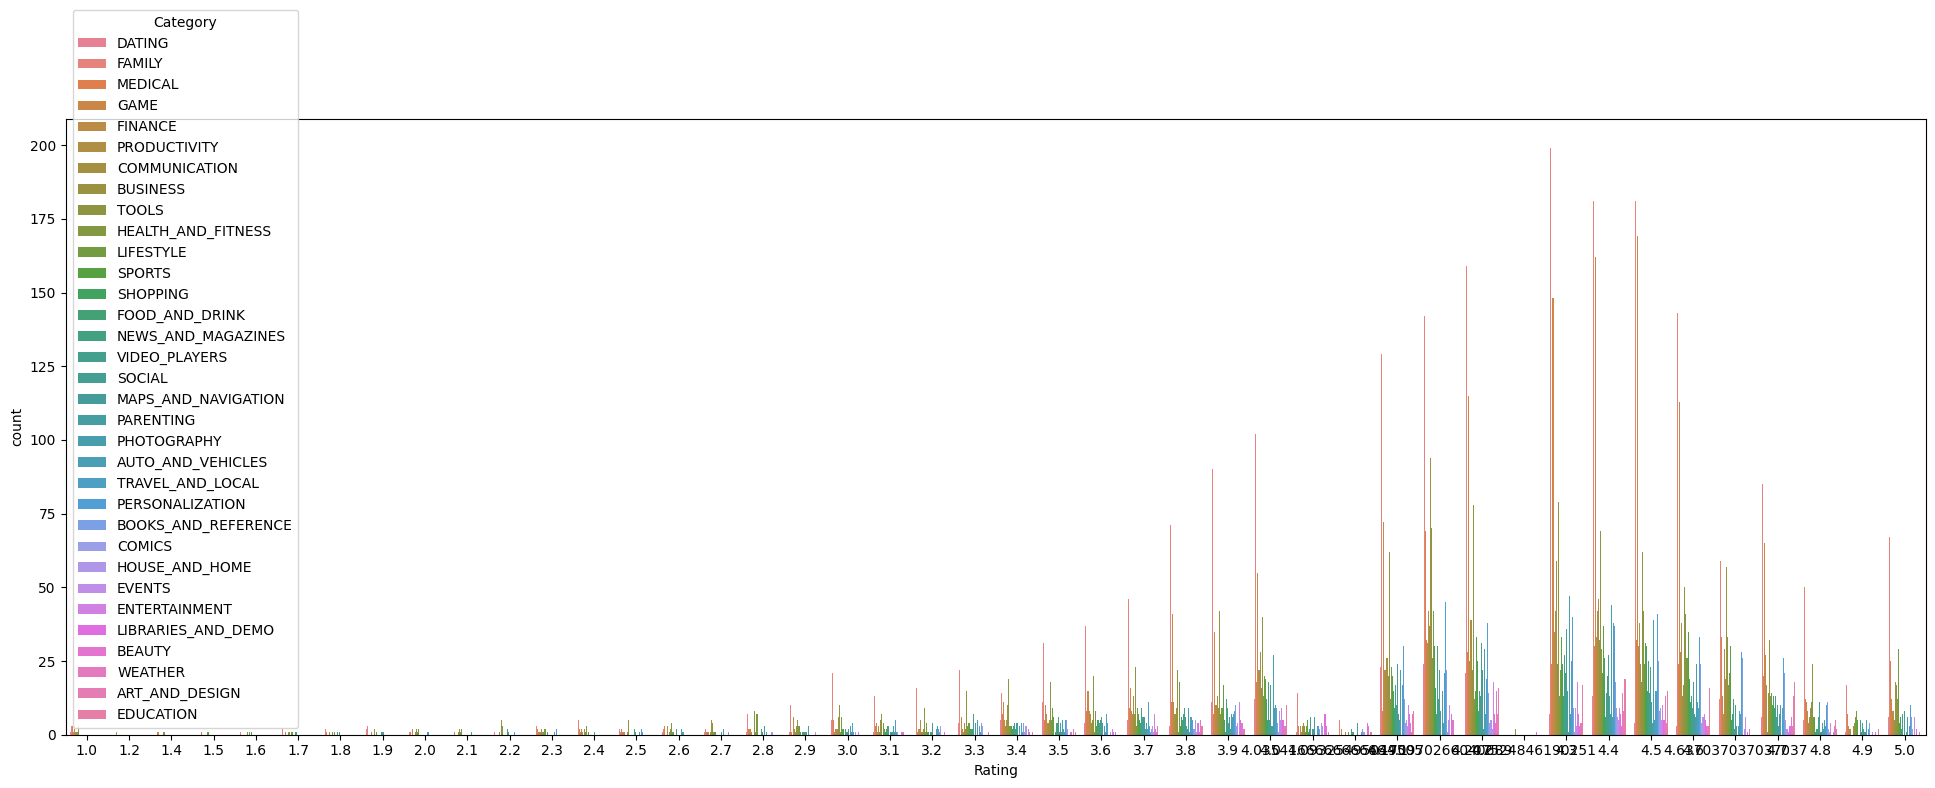

In [98]:
plt.figure(figsize=(24,8))
# plt.title("Free vs Paid")
sns.countplot(x='Rating',hue='Category',data=df)

### _Which category has the highest number of installs?_

In [99]:
df.groupby('Category')['Installs'].sum().sort_values(ascending=False).head(10)

Category
GAME                  31544024415
COMMUNICATION         24152276251
SOCIAL                12513867902
PRODUCTIVITY          12463091369
TOOLS                 11452271905
FAMILY                10041632405
PHOTOGRAPHY            9721247655
TRAVEL_AND_LOCAL       6361887146
VIDEO_PLAYERS          6222002720
NEWS_AND_MAGAZINES     5393217760
Name: Installs, dtype: int64

<Figure size 2000x600 with 0 Axes>

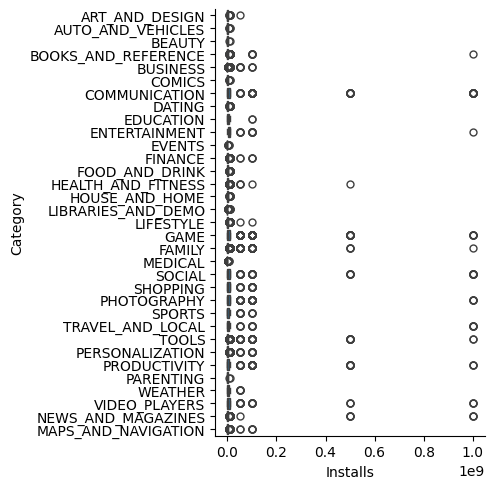

In [100]:
plt.figure(figsize=(20,6))
# plt.title("KKK")
sns.catplot(x='Installs',y='Category',kind='box',data=df)

### _Which category has the highest number of reviews?_

In [101]:
df.groupby('Category')['Reviews'].sum().sort_values(ascending=False).head(10)

Category
GAME               1.415537e+09
COMMUNICATION      6.012736e+08
SOCIAL             5.335768e+08
FAMILY             3.967717e+08
TOOLS              2.731810e+08
PHOTOGRAPHY        2.042974e+08
VIDEO_PLAYERS      1.103802e+08
PRODUCTIVITY       1.025545e+08
SHOPPING           9.493116e+07
PERSONALIZATION    7.519274e+07
Name: Reviews, dtype: float64

### _Which category has the highest rating?_

In [102]:
df.groupby('Category')['Rating'].mean().sort_values(ascending=False).head(10)

Category
EVENTS                 4.394346
EDUCATION              4.373794
ART_AND_DESIGN         4.367122
BOOKS_AND_REFERENCE    4.358435
PERSONALIZATION        4.333325
GAME                   4.281926
HEALTH_AND_FITNESS     4.273890
SOCIAL                 4.260441
PARENTING              4.259759
SHOPPING               4.253376
Name: Rating, dtype: float64

### _Which is range of rating in most of apps ?_

<Axes: xlabel='Rating', ylabel='Density'>

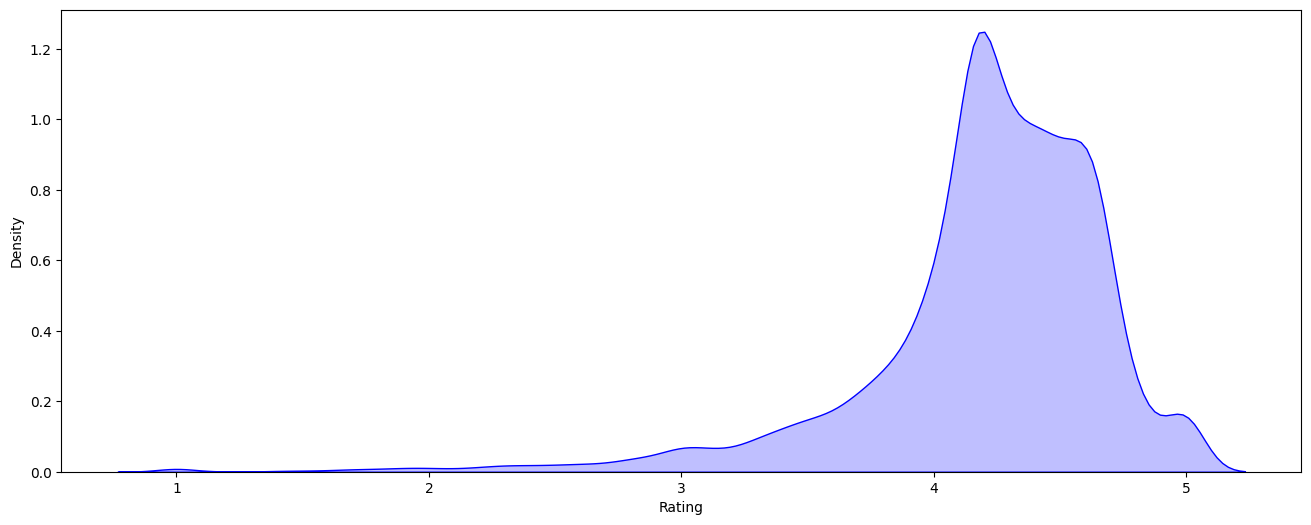

In [103]:
plt.figure(figsize=(16,6))
sns.kdeplot(df['Rating'],color='blue',shade=True)

### _Which type has the highest Installs?_

<Axes: xlabel='Type', ylabel='Installs'>

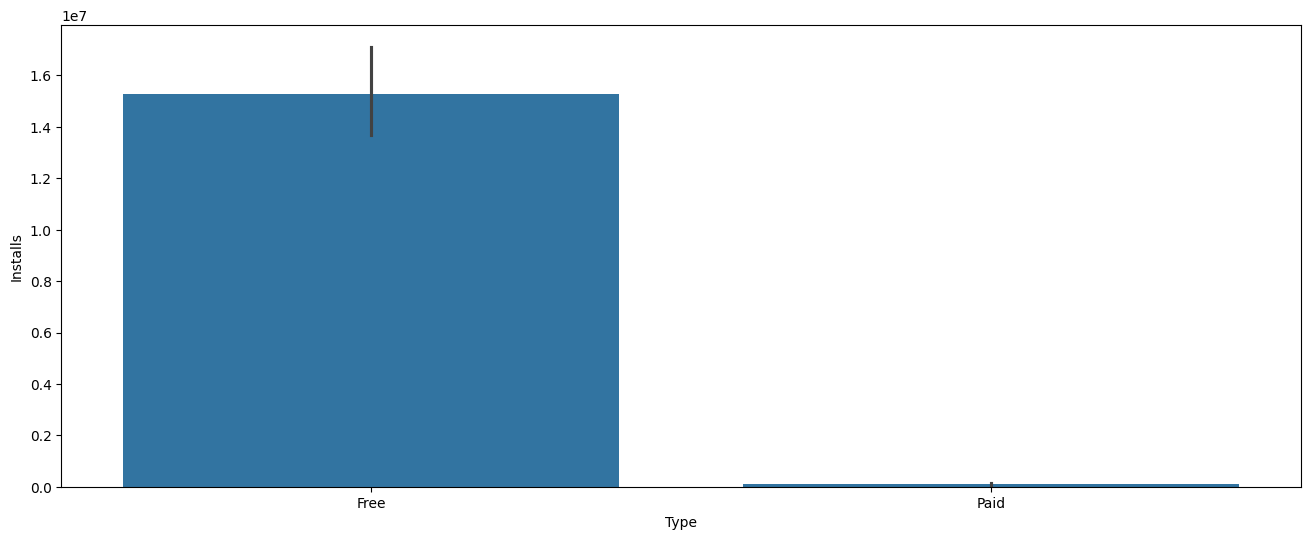

In [104]:
plt.figure(figsize=(16,6))
sns.barplot(x='Type',y='Installs',data=df)

<Axes: ylabel='count'>

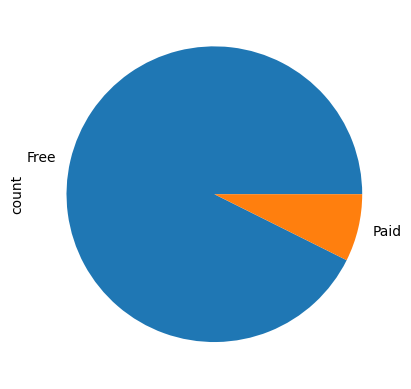

In [122]:
df['Type'].value_counts().plot(kind='pie')

### _Which price  has the highest installs?_

<Axes: xlabel='Installs', ylabel='Price'>

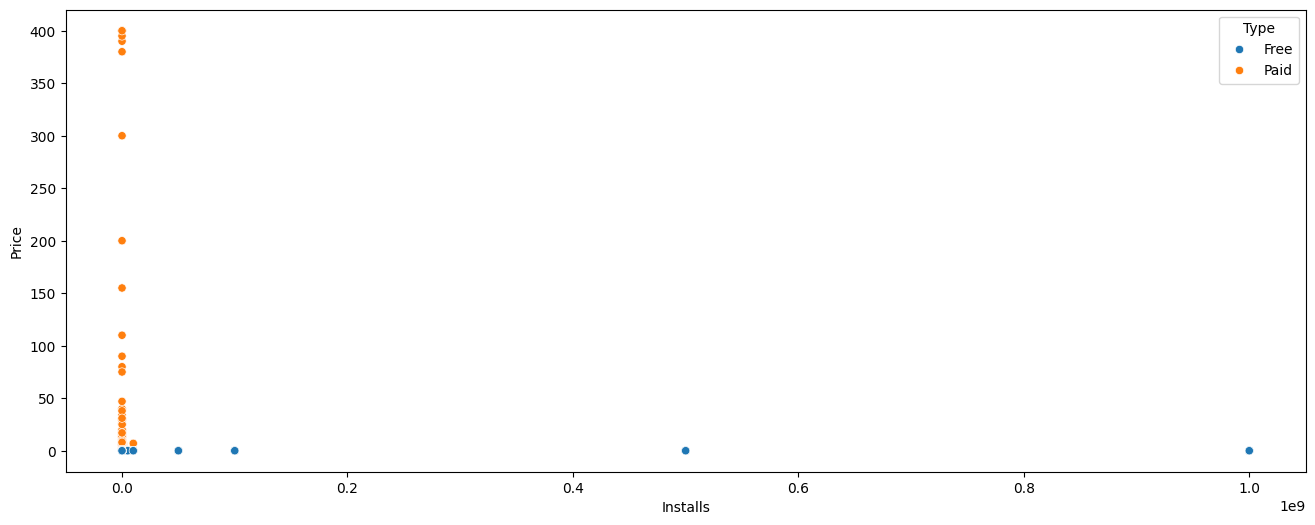

In [105]:
plt.figure(figsize=(16,6))
sns.scatterplot(x='Installs',y='Price',hue='Type',data=df)

### _Which Installs category has the average size?_

<Axes: xlabel='Installs_category', ylabel='Size_in_Mb'>

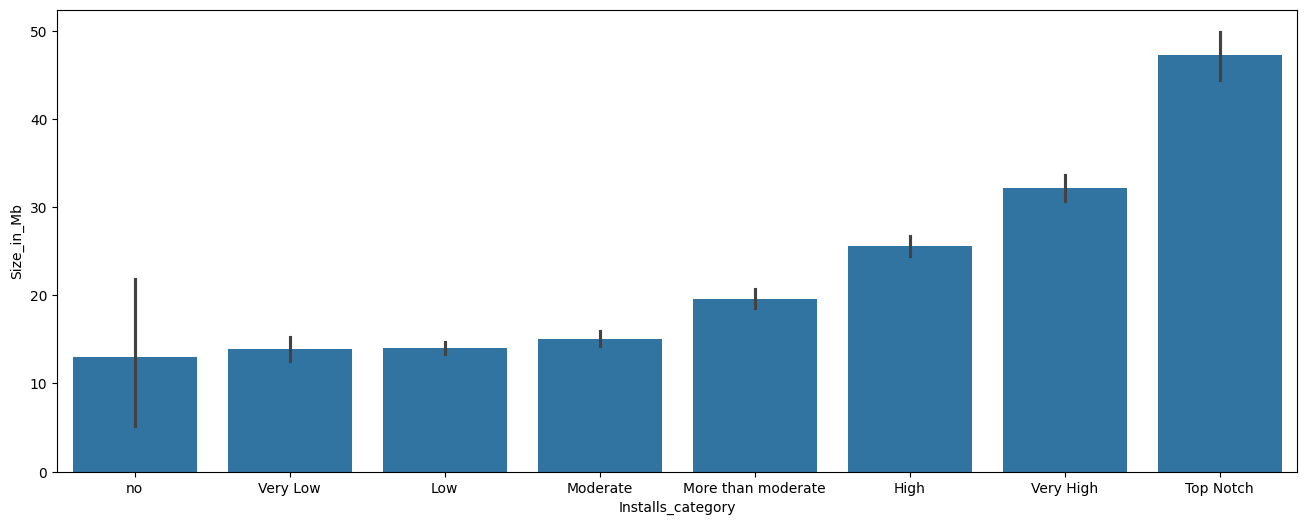

In [106]:
plt.figure(figsize=(16,6))
sns.barplot(x='Installs_category',y='Size_in_Mb',data=df)

### _Which app's has the most highest content rating?_

In [107]:
df['Content Rating'].value_counts() # this will show the value counts of each content rating

Content Rating
Everyone           8372
Teen               1146
Mature 17+          447
Everyone 10+        376
Adults only 18+       3
Unrated               2
Name: count, dtype: int64

<Axes: xlabel='Content Rating', ylabel='Installs'>

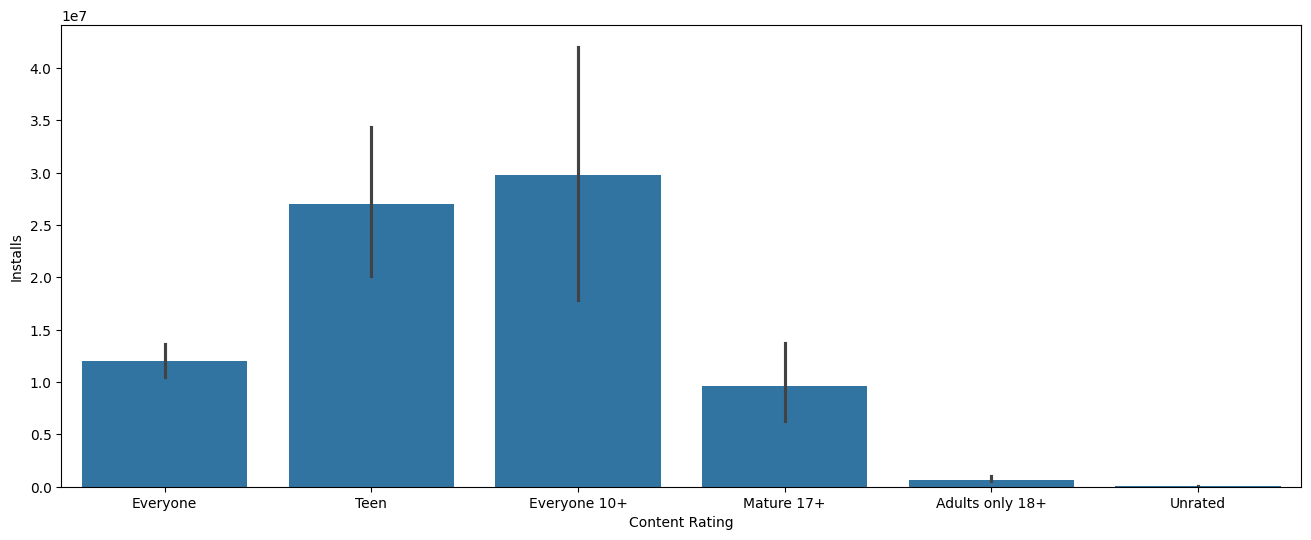

In [108]:
# plot the bar plot of Content Rating vs Installs
plt.figure(figsize=(16, 6)) # make figure size
sns.barplot(x='Content Rating', y='Installs', data=df) # plot the bar plot

### _Which category the content rating for everyone?_

In [109]:
df['Category'].loc[df['Content Rating']=='Everyone'].value_counts()

Category
FAMILY                 1498
TOOLS                   833
GAME                    595
BUSINESS                412
PRODUCTIVITY            396
MEDICAL                 390
FINANCE                 355
LIFESTYLE               337
COMMUNICATION           325
PERSONALIZATION         318
SPORTS                  318
PHOTOGRAPHY             307
HEALTH_AND_FITNESS      275
TRAVEL_AND_LOCAL        230
BOOKS_AND_REFERENCE     200
SHOPPING                183
NEWS_AND_MAGAZINES      168
VIDEO_PLAYERS           146
MAPS_AND_NAVIGATION     133
EDUCATION               121
FOOD_AND_DRINK          114
SOCIAL                   98
LIBRARIES_AND_DEMO       84
AUTO_AND_VEHICLES        83
HOUSE_AND_HOME           78
WEATHER                  78
ART_AND_DESIGN           60
PARENTING                58
EVENTS                   53
BEAUTY                   45
ENTERTAINMENT            37
COMICS                   26
DATING                   18
Name: count, dtype: int64

### _Which top 5 apps are the paid?_

<Axes: xlabel='App', ylabel='Rating'>

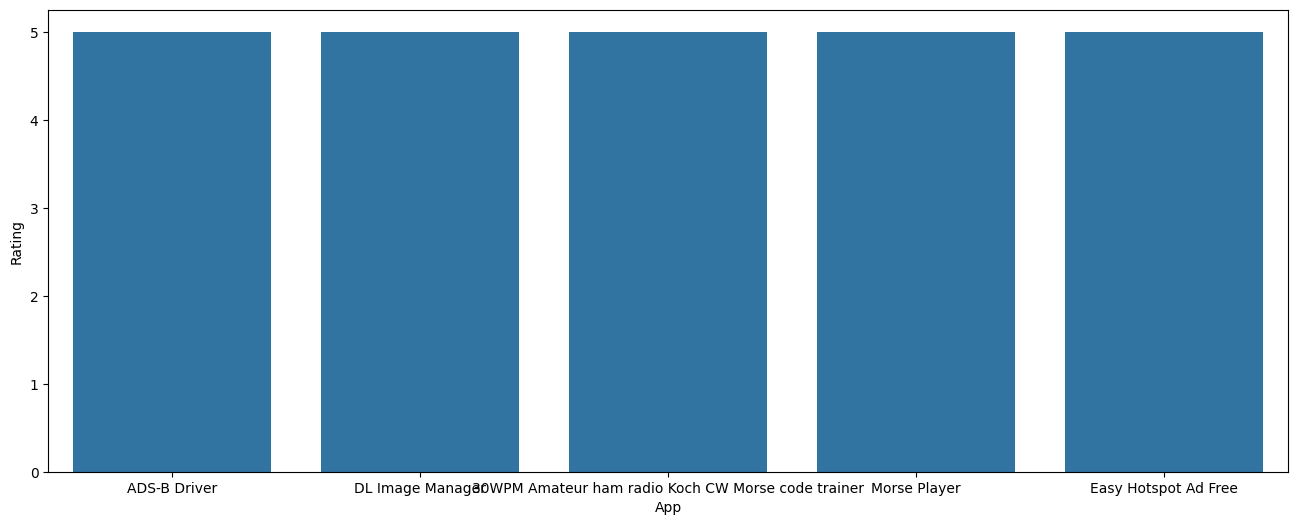

In [110]:
# plot top 5 rated paid apps
plt.figure(figsize=(16,6))
sns.barplot(x='App',y='Rating',data=df[df['Type']=='Paid'].sort_values(by='Rating',ascending=False).head(5))

In [111]:
df[df['Type'] == 'Paid'].sort_values(by='Rating', ascending=False).head(5)

,App,Category,Rating,Reviews,Size_in_bytes,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_in_Mb,Installs_category
3957,ADS-B Driver,TOOLS,5.0,2.0,6606028.8,100,Paid,1.99,Everyone,Tools,"May 15, 2018",1.19,4.4 and up,6.3,Low
8526,DL Image Manager,PRODUCTIVITY,5.0,2.0,1782579.2,10,Paid,0.99,Everyone,Productivity,"July 29, 2018",1.0.5,4.0 and up,1.7,Very Low
8018,30WPM Amateur ham radio Koch CW Morse code tra...,FAMILY,5.0,1.0,3879731.2,10,Paid,1.49,Everyone,Education,"May 18, 2018",2.0.2,2.1 and up,3.7,Very Low
8014,Morse Player,FAMILY,5.0,12.0,2516582.4,100,Paid,1.99,Everyone,Education,"January 23, 2017",2.1.1,3.0 and up,2.4,Low
4988,Easy Hotspot Ad Free,TOOLS,5.0,2.0,3460300.8,10,Paid,0.99,Everyone,Tools,"July 26, 2018",1.05,4.0 and up,3.3,Very Low


### _Which top 5 apps are the free?_

<Axes: xlabel='App', ylabel='Rating'>

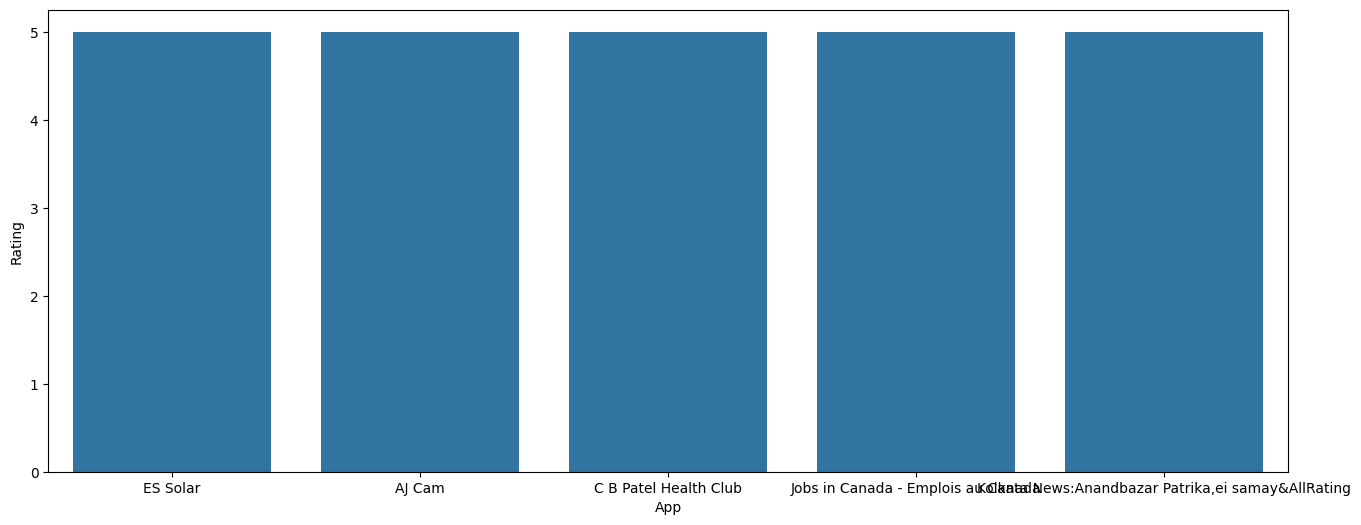

In [112]:
# plot top 5 rated free apps
plt.figure(figsize=(16,6))
sns.barplot(x='App',y='Rating',data=df[df['Type']=='Free'].sort_values(by='Rating',ascending=False).head(5))

In [113]:
df[df['Type']=='Free'].sort_values(by='Rating',ascending=False).head(5)

,App,Category,Rating,Reviews,Size_in_bytes,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_in_Mb,Installs_category
9815,ES Solar,BUSINESS,5.0,3.0,4928307.2,100,Free,0.0,Everyone,Business,"May 17, 2018",1.2,4.1 and up,4.7,Low
5230,AJ Cam,PHOTOGRAPHY,5.0,44.0,2936012.8,100,Free,0.0,Everyone,Photography,"January 23, 2018",1.0,4.1 and up,2.8,Low
7131,C B Patel Health Club,HEALTH_AND_FITNESS,5.0,5.0,14680064.0,100,Free,0.0,Everyone,Health & Fitness,"July 2, 2018",1.0.1,4.4 and up,14.0,Low
5685,Jobs in Canada - Emplois au Canada,BUSINESS,5.0,2.0,14680064.0,1000,Free,0.0,Teen,Business,"August 5, 2018",1.1,4.2 and up,14.0,Low
9444,"Kolkata News:Anandbazar Patrika,ei samay&AllRa...",NEWS_AND_MAGAZINES,5.0,10.0,5242880.0,100,Free,0.0,Everyone,News & Magazines,"July 14, 2018",1.0,4.0.3 and up,5.0,Low


### _Which top 5 free apps in terms of reviews?_

<Axes: xlabel='App', ylabel='Reviews'>

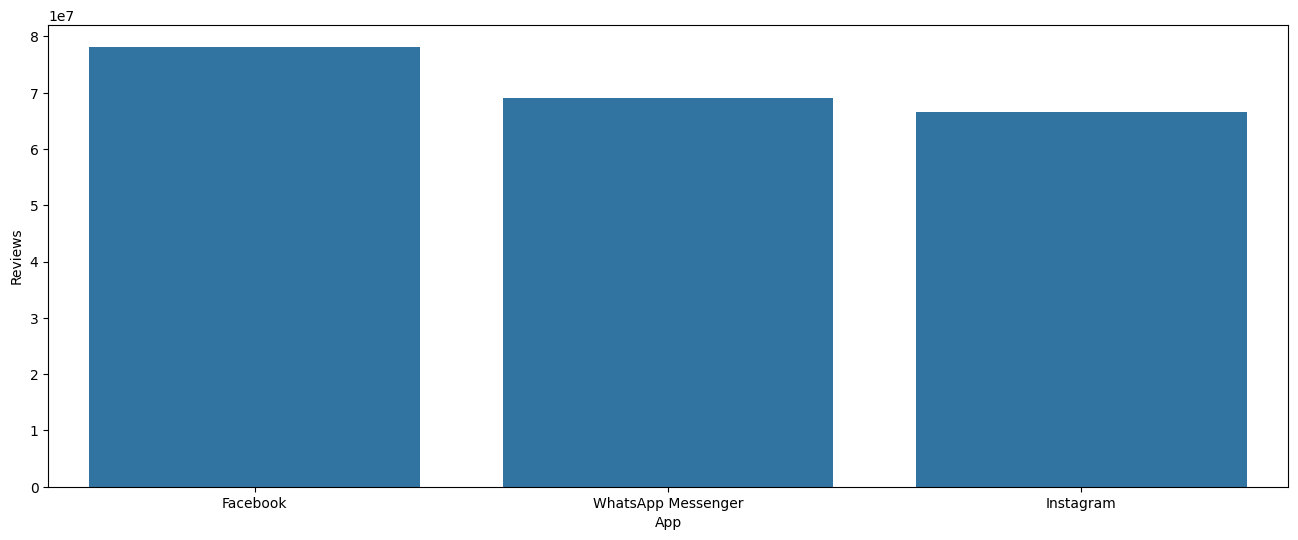

In [114]:
# Plot top 5 FREE apps with highest number of reviews
plt.figure(figsize=(16, 6)) # make figure size
sns.barplot(x='App', y='Reviews', data=df[df['Type'] == 'Free'].sort_values(by='Reviews', ascending=False).head(5)) 

In [115]:
df[df['Type']=='Free'].sort_values(by='Reviews',ascending=False).head(5)

,App,Category,Rating,Reviews,Size_in_bytes,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_in_Mb,Installs_category
2544,Facebook,SOCIAL,4.1,78158306.0,NaN,1000000000,Free,0.0,Teen,Social,"August 3, 2018",Varies with device,Varies with device,NaN,Top Notch
3943,Facebook,SOCIAL,4.1,78128208.0,NaN,1000000000,Free,0.0,Teen,Social,"August 3, 2018",Varies with device,Varies with device,NaN,Top Notch
336,WhatsApp Messenger,COMMUNICATION,4.4,69119316.0,NaN,1000000000,Free,0.0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device,NaN,Top Notch
3904,WhatsApp Messenger,COMMUNICATION,4.4,69109672.0,NaN,1000000000,Free,0.0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device,NaN,Top Notch
2604,Instagram,SOCIAL,4.5,66577446.0,NaN,1000000000,Free,0.0,Teen,Social,"July 31, 2018",Varies with device,Varies with device,NaN,Top Notch


### _Which top 5 paid apps in terms of reviews?_

<Axes: xlabel='App', ylabel='Reviews'>

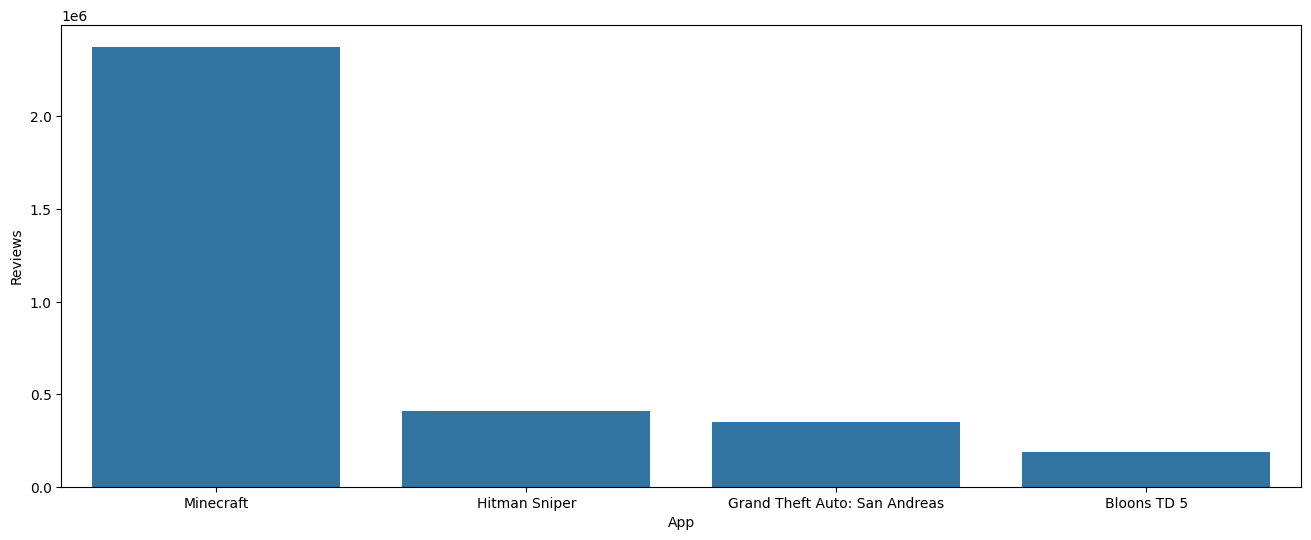

In [116]:
# Plot top 5 Paid apps with highest number of reviews
plt.figure(figsize=(16, 6)) # make figure size
sns.barplot(x='App', y='Reviews', data=df[df['Type'] == 'Paid'].sort_values(by='Reviews', ascending=False).head(5)) 

In [117]:
df.shape

(10346, 15)